<a href="https://colab.research.google.com/github/peterphoenix/School-Projects/blob/master/MID_ANN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peter Phoenix - 2201735413
Artificial Neural Network - LA01

3

In [ ]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# input dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
t_samples = len(digits.target)

data = digits.data
# output dataset            
target = digits.target.reshape((t_samples, -1))


data = MinMaxScaler().fit_transform(data)
target = OneHotEncoder(sparse = False).fit_transform(target)

np.random.seed(1)
alpha = 0.001

syn0 = np.random.uniform(size=(64,20))
bias0 =np.random.uniform(size=(1,20))
syn1 = np.random.uniform(size=(20,10))
bias1 = np.random.uniform(size=(1,10))

X, feature_test, y, target_test = train_test_split(
    data, target, test_size=0.2)

target_test = np.argmax(target_test, axis = 1)

acc_list = []
epoch_list = []

Pada bagian diatas, semua library yang dibutuhkan diimport, kemudian rumus sigmoid didefinisikan.

Input data didapatkan dari datasets.load_digits() sesuai dengan ketentuan soal. Kemudian dilakukan normalisasi data menggunakan MinMaxScaler dan OneHotEncoder.

Alpha serta bias ditentukan secara random dengan hidden layer sebanyak 20, kemudian dataset dibagi menjadi training dataset dan test dataset dengan rincian 80% menjadi training dan 20% menjadi test.

Digunakan argmax pada target_test agar output yang didapatkan untuk setiap test hanya berupa 1 angka saja.

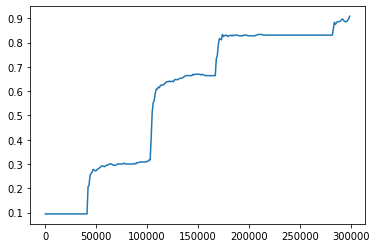

In [ ]:
for idx in range(300000):
    #Forward Propagation --> Batch Learning
    l1 = nonlin(np.dot(X,syn0) + bias0)
    l2 = nonlin(np.dot(l1,syn1) + bias1)
  
    #Backpropagation
    l2_error = y - l2
    l2_delta = l2_error * nonlin(l2, deriv = True)
    
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * nonlin(l1, deriv = True)

    #Updating Weights and Biases
    syn1 += l1.T.dot(l2_delta) * alpha
    bias1 += np.sum(l2_delta,axis=0,keepdims=True) * alpha
    syn0 += X.T.dot(l1_delta) * alpha
    bias0 += np.sum(l1_delta,axis=0,keepdims=True) * alpha

    if (idx) % 1000 == 0:
      l1_temp = nonlin(np.dot(feature_test,syn0) + bias0)
      l2_temp = nonlin(np.dot(l1_temp,syn1) + bias1)
      result_temp = np.argmax(l2_temp, axis = 1)
      accuracy_temp = metrics.accuracy_score(target_test, result_temp)
      acc_list.append(accuracy_temp)
      epoch_list.append(idx)
  
plt.plot(epoch_list, acc_list)
plt.show()


Pada tahap diatas adalah tahap training, menggunakan batch training. Batch training memang memakan waktu yang lebih lama dibandingkan online atau mini-batch, namun hasil yang didapatkan menjadi lebih konsisten dan akurat.

Setiap 1000 epoch dilakukan append pada list akurasi dan list epoch untuk dibuat menjadi validation curve nantinya.

Dapat dilihat validation curve diatas dengan garis biru merupakan akurasi. Sumbu-x menandakan jumlah epoch dan sumbu-y merupakan nilai akurasi dalam desimal.

In [ ]:
l1 = nonlin(np.dot(feature_test,syn0) + bias0)
l2 = nonlin(np.dot(l1,syn1) + bias1)

result = np.argmax(l2, axis = 1)
accuracy = metrics.accuracy_score(target_test, result)
print ("Accuracy :{}%".format(accuracy*100))
confusion = metrics.confusion_matrix(target_test, result)
print(confusion)
precision = metrics.precision_score(target_test, result, average = None)
recall = metrics.recall_score(target_test, result, average = None)
f1 = metrics.f1_score(target_test, result, average = None)

                                    
for i in range(0,10):
  print("")
  print("Kelas {}".format(i))
  print("Precision :{}%".format(precision[i]*100))
  print("Recall :{}%".format(recall[i]*100))
  print("F1 Score :{}".format(f1[i]))

Accuracy :91.38888888888889%
[[31  0  0  0  1  0  1  0  0  0]
 [ 0 29  1  0  0  0  2  0  2  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  1  2]
 [ 0  1  0  0 33  0  0  0  0  0]
 [ 0  0  0  0  0 43  1  2  0  0]
 [ 0  1  0  0  0  0 33  0  0  0]
 [ 0  2  0  1  1  0  1 37  1  0]
 [ 0  2  1  0  0  1  0  0 25  1]
 [ 0  0  0  0  1  0  2  0  2 31]]

Kelas 0
Precision :100.0%
Recall :93.93939393939394%
F1 Score :0.96875

Kelas 1
Precision :82.85714285714286%
Recall :85.29411764705883%
F1 Score :0.8405797101449276

Kelas 2
Precision :94.11764705882352%
Recall :100.0%
F1 Score :0.9696969696969697

Kelas 3
Precision :97.22222222222221%
Recall :92.10526315789474%
F1 Score :0.9459459459459458

Kelas 4
Precision :91.66666666666666%
Recall :97.05882352941177%
F1 Score :0.9428571428571428

Kelas 5
Precision :97.72727272727273%
Recall :93.47826086956522%
F1 Score :0.9555555555555557

Kelas 6
Precision :82.5%
Recall :97.05882352941177%
F1 Score :0.8918918918918919

Kelas 7
Precision :94.

Tahap diatas merupakan tahap testing dengan hasil akurasi final, yaitu: 91.38888888888889%

Digambarkan juga confusion matrix serta nilai Precision, Recall, dan F1-Score untuk setiap kelas